# What is the impact of class imbalance and different sampling methods on the performance of machine learning algorithms for classification?

Class imbalance is a common challenge in many real-world classification problems. Having significantly fewer samples for one class can lead to biasad models that favor the majority class. This results in poor performance in detecting the minority class. In this research project, we investigate the impact of class imbalance on the performance of two popular machine learning algorithms: Support Vector Machines (SVM) and Neural Networks (NN). We compare the in-sample and out-of-sample performance of these algorithms on datasets with varying degrees of class imbalance using different techniques to adress this issue. Our goal is to provide insights into strengths and weaknesses of each algorithm and to identify the effective approach.


# Linear Support Vector Machines

A linear Support Vector Machine (SVM) is a supervised machine learning algorithm used for binary classification tasks. It is particularly effective when the data can be separated into two classes by a linear boundary.

The goal of a linear SVM is to find the best hyperplane that maximally separates the two classes in the feature space. This hyperplane is defined as a linear decision boundary that assigns labels to new instances based on which side of the hyperplane they fall on.


# The impact of class imbalance, comparing Support Vector Machines with Neural Networks

In [2]:
#import required for libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn


from sklearn.svm import LinearSVC
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

#from sklearn.inspection import DecisionBoundaryDisplay
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn import FunctionSampler  # to use a idendity sampler
from imblearn.pipeline import make_pipeline


import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress the ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)



2023-05-28 17:31:14.911021: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-28 17:31:14.952887: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-28 17:31:14.953456: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 17:31:15.932894: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
# 3 of 8 random state
def create_dataset(weights, n_samples, n_classes,
                   class_sep, n_clusters):
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=5)

In [9]:
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

# SYNTHETIC DATASET

Class imbalance refers to a situation where the number of samples in different classes of a dataset is significantly uneven. This can have an impact on the decision boundary learned by a machine learning model, potentially leading to biased or skewed predictions. To illustrate the impact of class imbalances on the decision boundry we generated 4 synthetic datasets. Each set contains 2 classes but the level of imbalance vary.

1. Very unbalanced dataset: \
One class is heavily overrepresented, while the other class is underrepresented. This extreme class imbalance can make it challenging for a model to accurately learn the minority class, as the decision boundary may prioritize the majority class.
2. Unbalanced dataset: \
The majority class is still overrepresented but the imbalance is not as extreme as the very unbalanced dataset. The decision boundary in this case may show some consideration for the minority class, but it still is influenced by the majority class.
3. Moderate unbalanced dataset \
This dataset still exhibits a noticeable class imbalance, but to a lesser extent compared to the previous dataset.  The decision boundary learned by a model on this dataset may be more balanced, giving reasonable consideration to both classes.
4. Balanced Dataset: \
The last dataset is balanced, with an equal number of samples in each class. There is no class imbalance present, and the decision boundary learned by a model on this dataset should ideally provide fair and accurate predictions for both classes.

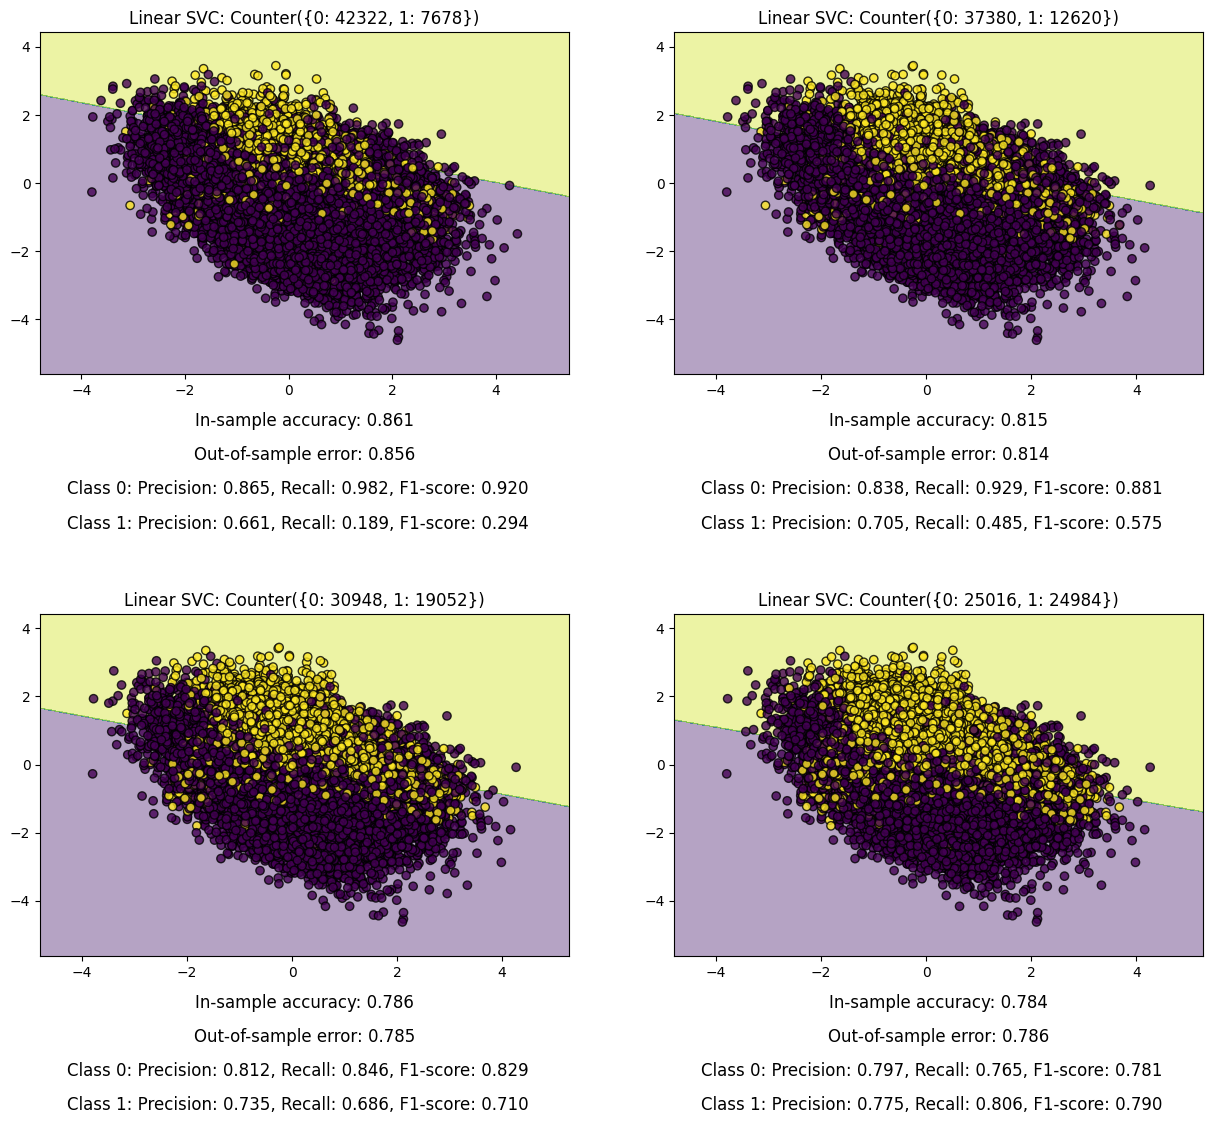

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.subplots_adjust(wspace=0.2, hspace=0.7)

ax_arr = (ax1, ax2, ax3, ax4)

weights_arr = ((0.85, 0.15), (0.75, 0.25), (0.62, 0.38), (0.5, 0.5))

for ax, weights in zip(ax_arr, weights_arr):
    X, y = create_dataset(weights=weights, n_samples=50000, n_classes=2,
                   class_sep=0.6, n_clusters=2)
 
    ax.set_title('Linear SVC: {}'.format(Counter(y)))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    clf = LinearSVC().fit(X_train, y_train)
    
    plot_decision_function(X, y, clf, ax)
    
    y_true = y_test
    
    
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, y_pred_train)

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, y_pred_test)
    
    cm = confusion_matrix(y_true, y_pred_test)
    
    ax.text(0.5, -0.15, "In-sample accuracy: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    ax.text(0.5, -0.25, "Out-of-sample accuracy: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    
    class_labels = np.unique(y)
    report = classification_report(y_true, y_pred_test, zero_division=1, output_dict=True)

    for i, label in enumerate(class_labels):
        ax.text(0.05, -0.35-i*0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)




When working with imbalanced datasets, it is important not only to look at the in- and out-of-sample accuracy as a metric to evaluate the performance of the model. Due to the class imbalance, these metrics can be misleading and do not reflect how well the model is handling the minority class.

Precision is the ratio of true positives to all the positives. It measures the model's ability to correctly identify positive instances. A high precision indicates a high rate of false positives.

Recall, on the other hand, is the ratio of true positives to the sum of true positives and false negatives. It measures the model's ability to correctly identify true positive instances. It is also called the Sensitivity or the True Positive Rate. A high recall indicates a low rate of false negatives.

The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of a model's performance on both precision and recall.

These metrics provide a more nuanced understanding of how well the model is performing on imbalanced datasets as they can highlight the model's ability to handle the minority class.

By looking at the in- and out-of-sample error, we can conclude that the model predicting the most unbalanced dataset scored best. The precision and recall of the majority class are high, indicating a low rate of false positives and a high rate of false negatives. Because the class is very unbalanced, this means the model is able to correctly classify the larger majority of the dataset, leading to an in- and out-of-sample accuracy of approximately 0.85.

However, by looking at the F1-score and the recall, we observe that the model is failing to capture the positive instances.

As the dataset gets slightly more balanced, the precision, recall, and F1-score of the minority class improve while keeping the same precision and recall for the majority set. This indicates that balancing the dataset allows the model to have a better opportunity to learn from both classes.

# Neural Nets

469/469 [==============================] - 1s 2ms/step


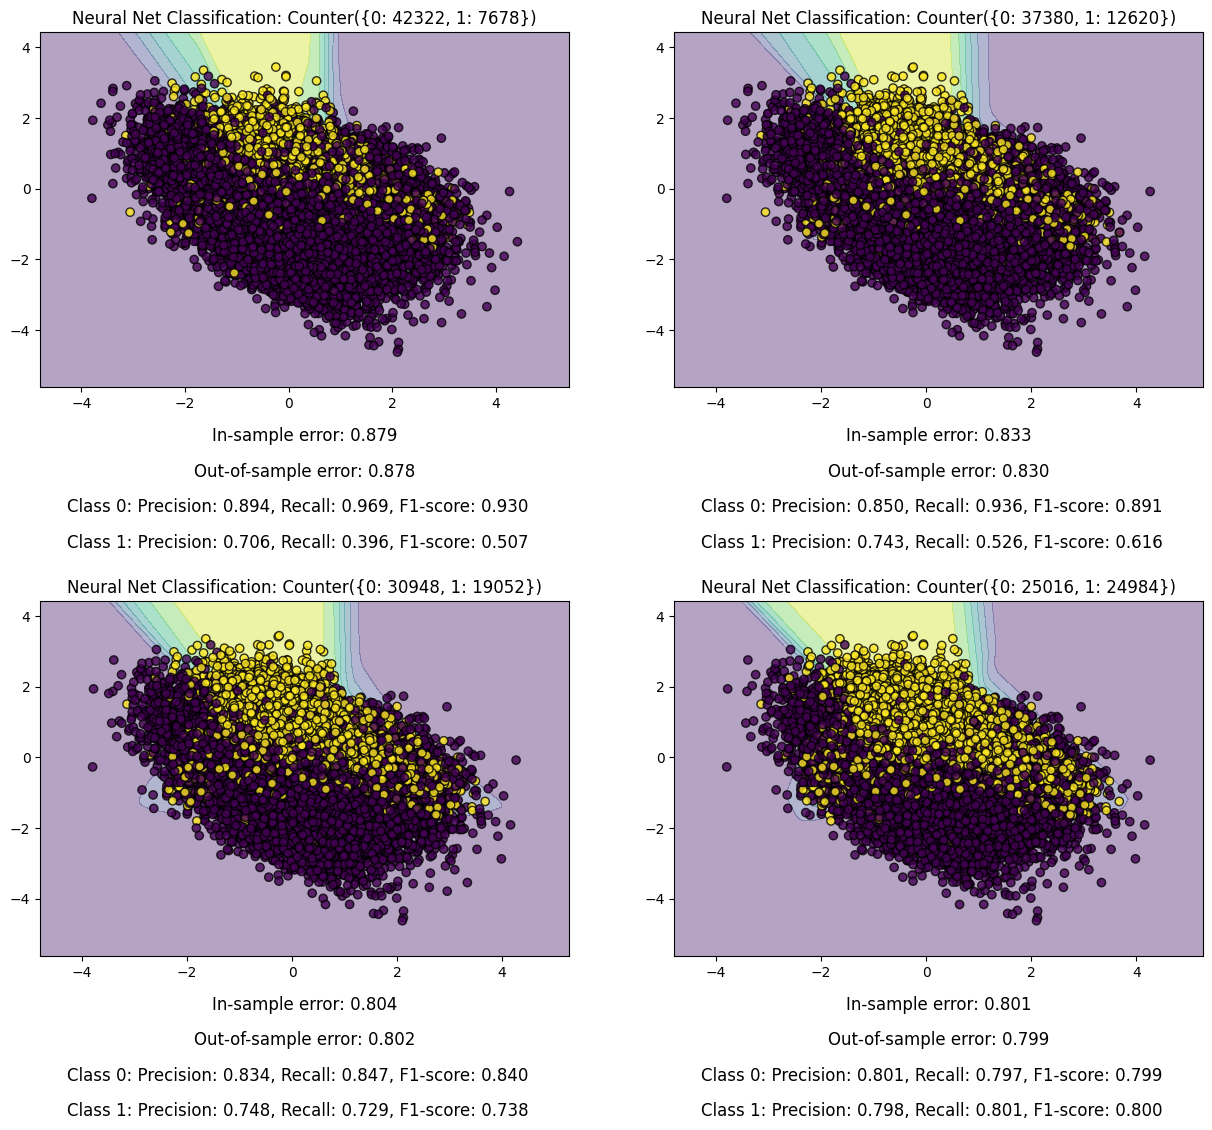

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.subplots_adjust(wspace=0.2, hspace=0.6)

ax_arr = (ax1, ax2, ax3, ax4)

weights_arr = ((0.85, 0.15), (0.75, 0.25), (0.62, 0.38), (0.5, 0.5))

for ax, weights in zip(ax_arr, weights_arr):
    X, y = create_dataset(weights=weights, n_samples=50000, n_classes=2, class_sep=0.6, n_clusters=2)

    ax.set_title('Neural Net Classification: {}'.format(Counter(y)))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Neural Net
    clf = Sequential()
    clf.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
    clf.add(Dense(64, activation='relu')) 
    clf.add(Dense(46, activation='relu'))# Hidden layer
    clf.add(Dense(1, activation='sigmoid'))  # Output layer

    # Compile the model with the custom loss function
    clf.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['acc',tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
    
    clf.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    
    plot_decision_function(X, y, clf, ax)
    
    y_true = y_test
    
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, np.round(y_pred_train))

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, np.round(y_pred_test))
    
    ax.text(0.5, -0.15, "In-sample error: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    ax.text(0.5, -0.25, "Out-of-sample error: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    
    class_labels = np.unique(y)
    report = classification_report(y_true, np.round(y_pred_test).astype(int), zero_division=1, output_dict=True)

    for label in class_labels:
        ax.text(0.05, -0.35 - label * 0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)

    

Based on our observation, we find that a neural network is less influenced by the class imbalance compared to an SVM. This suggests that a neural network may have inherent capabilities to handle the imbalanced dataset more effectively. They can learn complex patterns from data and adapt their internal parameters to handle the class imbalance.

The in- and out-of-sample error of the neural network and SVM predicting the most unbalanced dataset is comparable. However, when considering precision, recall, and F1-score, the neural network demonstrates superior performance.

A recall of approximately 0.5 for the neural network on the most imbalanced dataset indicates that it is able to correctly identify a larger proportion of positive instances in the minority class compared to the SVM's recall of approximately 0.2. Also, the precision and F1-score are higher, indicating that the neural network performs better across all three metrics. Although the metrics are higher, they are not at a satisfactory level. The class imbalance still poses a challenge. We observe that also in the case of the neural network, the metrics improve as the classes get more balanced, indicating the potential of additional techniques to improve performance.

# OVERSAMPLING 

## Random over-sampling
The most naive class of techniques for dealing with class imbalances is sampling. Random over-sampling involves duplicating some of the minority class samples at random until the dataset is balanced. This helps the model to learn from more examples of the minority class, potentially improving its ability to classify these instances accurately.

However, this approach of duplicating may not effectively capture the underlying distribution of the minority class, leading to overfitting and biased results.

## SMOTE & ADASYN
Synthetic Minority Over-Sampling (SMOTE) and Adaptive Synthetic Sampling (ADASYN) are more advanced techniques that generate samples based on interpolation. However, the samples used to interpolate new synthetic samples differ. ADASYN is an extension of SMOTE and focuses on generating samples next to the original samples that are wrongly classified using a k-Nearest Neighbors classifier. SMOTE, on the other hand, does not make any distinction between easy and hard samples and generates samples uniformly across the minority class.(https://imbalanced-learn.org/stable/over_sampling.html#smote-adasyn). 


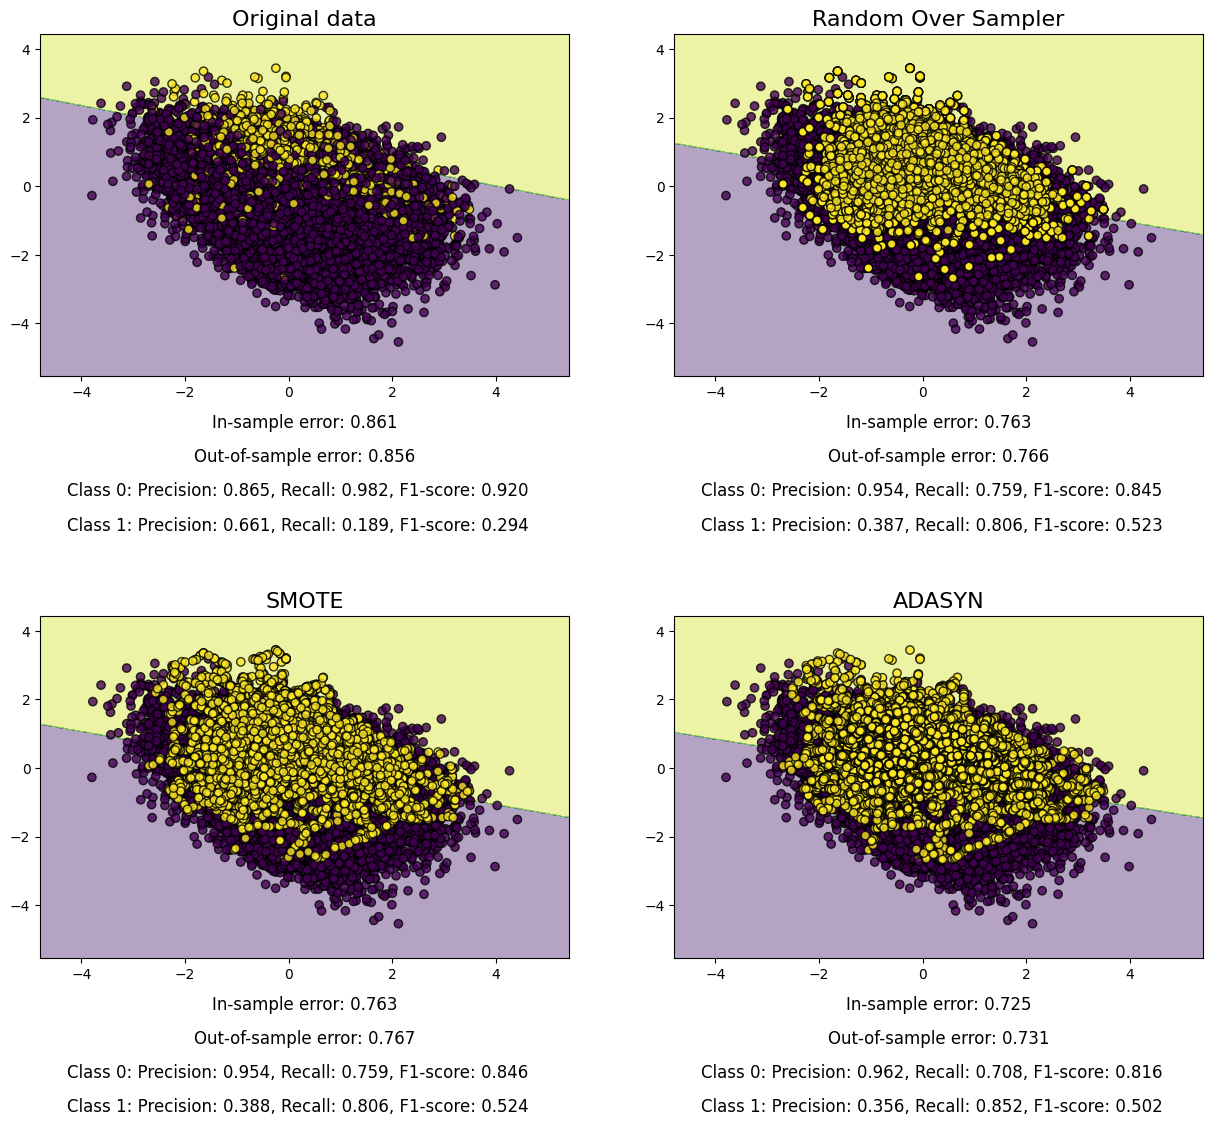

In [58]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.subplots_adjust(wspace=0.2, hspace=0.7)

ax_arr = (ax1, ax2, ax3, ax4)
samplers = [
    FunctionSampler(),
    RandomOverSampler(random_state=0),
    SMOTE(random_state=0),
    ADASYN(random_state=0),
]

titles = ["Original data", "Random Over Sampler", "SMOTE", "ADASYN"]

for ax, sampler, title in zip(ax_arr, samplers, titles):
    X, y = create_dataset(weights=(0.85, 0.15), n_samples=50000, n_classes=2,
                   class_sep=0.6, n_clusters=2)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    clf = LinearSVC()
    
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    clf.fit(X_resampled, y_resampled)
    plot_decision_function(X_resampled, y_resampled, clf, ax)
    
    ax.set_title(title, fontsize=16)
    
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, y_pred_train)

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, y_pred_test)
    
    ax.text(0.5, -0.15, "In-sample error: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    ax.text(0.5, -0.25, "Out-of-sample error: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    
    y_true = y_test
    
    class_labels = np.unique(y)
    report = classification_report(y_true, y_pred_test, zero_division=1, output_dict=True)

    for i, label in enumerate(class_labels):
        ax.text(0.05, -0.35-i*0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)

To evaluate and compare the effect of different over-sampling techniques, we used the most unbalanced synthetic dataset from the first comparison. We observe an improvement in recall compared to the baseline. This improvement suggests that the models are better at recognizing the minority class and reducing false negative mistakes. However, this improvement comes at the expense of precision. The recall-precision trade-off can be understood as a consequence of sampling positive instances. By increasing the number of positive samples in the training set, the model can become more familiar with the minority class and its unique characteristics. This indirectly lowers the threshold for classifying an instance as positive, leading to more true positive instances from the minority class but also more false positive instances from the majority class. As a result, the precision decreases and recall increases because more true positives lead to fewer false negatives.

469/469 [==============================] - 0s 855us/step


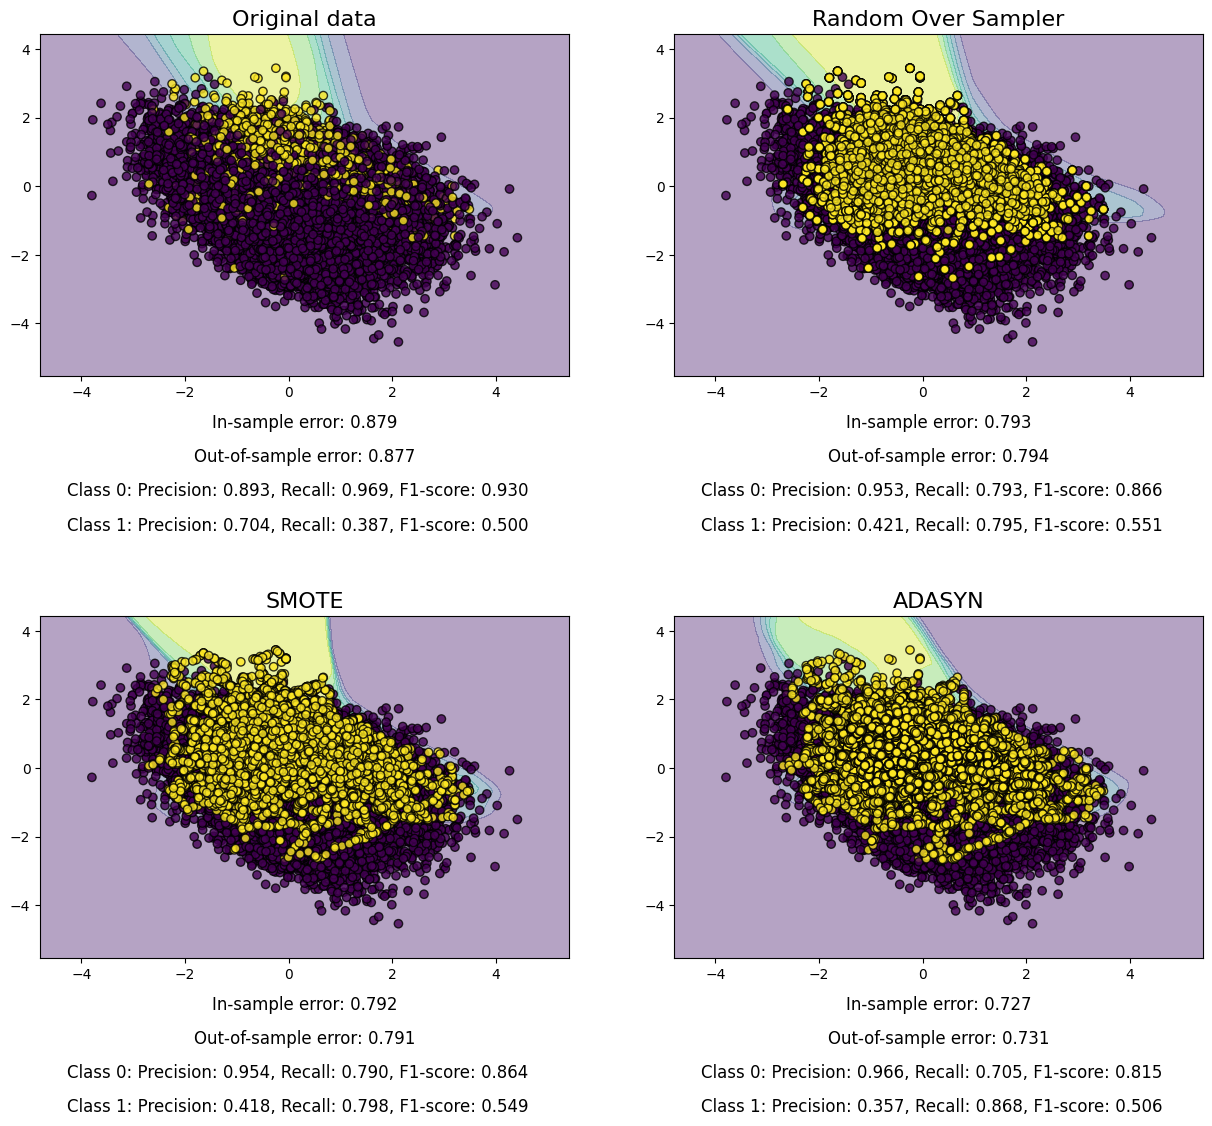

In [57]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.subplots_adjust(wspace=0.2, hspace=0.7)

ax_arr = (ax1, ax2, ax3, ax4)
samplers = [
    FunctionSampler(),
    RandomOverSampler(random_state=0),
    SMOTE(random_state=0),
    ADASYN(random_state=0),
]

titles = ["Original data", "Random Over Sampler", "SMOTE", "ADASYN"]

for ax, sampler, title in zip(ax_arr, samplers, titles):
    X, y = create_dataset(weights=(0.85, 0.15), n_samples=50000, n_classes=2,
                   class_sep=0.6, n_clusters=2)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

    # Neural Net
    #clf = Sequential()
    #clf.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
    #clf.add(Dense(64, activation='relu')) 
    #clf.add(Dense(46, activation='relu'))# Hidden layer
    #clf.add(Dense(1, activation='sigmoid'))  # Output layer
    
    clf = Sequential()
    clf.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    clf.add(Dense(256, activation='relu'))
    clf.add(Dropout(0.5))
    clf.add(Dense(128, activation='relu'))
    clf.add(Dense(64, activation='relu'))
    clf.add(Dropout(0.3))
    clf.add(Dense(1, activation='sigmoid'))


    # Compile the model
    clf.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['acc',tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
    clf.fit(X_resampled, y_resampled, epochs=50, verbose=0)
    
    plot_decision_function(X_resampled, y_resampled, clf, ax)
    ax.set_title(title, fontsize=16)
    
    y_true = y_test
    
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, np.round(y_pred_train))

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, np.round(y_pred_test))
    
    ax.text(0.5, -0.15, "In-sample error: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    ax.text(0.5, -0.25, "Out-of-sample error: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    
    class_labels = np.unique(y)
    report = classification_report(y_true, np.round(y_pred_test).astype(int), zero_division=1, output_dict=True)

    for label in class_labels:
        ax.text(0.05, -0.35 - label * 0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)


After applying the over-sampling techniques to the neural network (NN) model, we observed that the F1-score of the minority class remained unchanged. Despite the NN model initially having a higher F1-score compared to the support vector machine (SVM) model, it did not utilize this advantage to further enhance the F1-score. The NN model, similar to the SVM model, is subject to a precision-recall trade-off when dealing with class imbalance. Although the recall experienced significant improvement, it came at the cost of precision.

# CONCLUSION 

After exploring various techniques, it appears that the tradeoff is inevitable. Although there are many more techniques and approaches to explore, our findings suggest that there is no one-size-fits-all solution, and the choice of techniques and tradeoffs heavily depends on the specific requirements and objectives of the classification task.

Therefore, it's crucial to carefully evaluate the specific context of the problem at hand. Depending on the problem and the desired balance between precision and recall, different loss functions or sampling techniques may yield different tradeoffs and performance outcomes.

 

# REAL-WORLD DATA
## Diabetes prediction dataset

To further evaluate the effectiveness of the different techniques, we employed the Diabetes prediction kaggle dataset, which is well-suited for our purpose due to its representation of a real-world scenario with a significant class imbalance. It is a collection of medical and demographic data from patience, along with their diabetes status being positive or negative. The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. (source https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset).

In [3]:
path = "./data/diabetes_prediction_dataset.csv"
data = pd.read_csv(path)
data.head()

gender   age  hypertension  heart_disease smoking_history    bmi   
0  Female  80.0             0              1           never  25.19  \
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [110]:
labels.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [4]:
X = data.drop(['diabetes'], axis=1)
y = data['diabetes']

In [5]:
# Preprocessing - OneHotEncoding Categorical Values
X_encoded = pd.get_dummies(X, columns = ['gender', 'smoking_history'])

# Split beforehand to avoid more randomness comparing the performances
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [154]:
samplers = [
    FunctionSampler(),
    RandomOverSampler(random_state=0),
    SMOTE(random_state=0),
    ADASYN(random_state=0),
]

titles = ["Original data", "Random Over Sampler", "SMOTE", "ADASYN"]

for sampler, title in zip(samplers, titles):
    
    clf = LinearSVC(max_iter=10000)
    
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    clf.fit(X_resampled, y_resampled)
    
     
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, y_pred_train)

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, y_pred_test)
    
    print(title)
    print("In-sample error: {:.3f}".format(in_sample_error))
    print("Out-of-sample error: {:.3f}".format(out_of_sample_error))
    
    y_true = y_test
    
    class_labels = np.unique(y)
    report = classification_report(y_true, y_pred_test, zero_division=1, output_dict=True)

    for i, label in enumerate(class_labels):
        print("Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, 
                                                                                     report[str(label)]['precision'],
                                                                                     report[str(label)]['recall'], 
                                                                                     report[str(label)]['f1-score']))
    print(" ")

Original data
In-sample error: 0.959
Out-of-sample error: 0.957
Class 0: Precision: 0.956, Recall: 0.998, F1-score: 0.977
Class 1: Precision: 0.963, Recall: 0.509, F1-score: 0.666
 
Random Over Sampler
In-sample error: 0.948
Out-of-sample error: 0.948
Class 0: Precision: 0.974, Recall: 0.969, F1-score: 0.972
Class 1: Precision: 0.685, Recall: 0.720, F1-score: 0.702
 
SMOTE
In-sample error: 0.867
Out-of-sample error: 0.865
Class 0: Precision: 0.986, Recall: 0.865, F1-score: 0.922
Class 1: Precision: 0.374, Recall: 0.865, F1-score: 0.522
 
ADASYN
In-sample error: 0.898
Out-of-sample error: 0.897
Class 0: Precision: 0.983, Recall: 0.903, F1-score: 0.941
Class 1: Precision: 0.443, Recall: 0.834, F1-score: 0.579
 


When dealing with heath issues like diabetes it is often more important to have a higher recall indicating fewer false negatives. This is because failing to identify an individual with diabetes results in missing out on necessary treatments or interventions. On the other hand, misdiagnosing a healthy individual and having diabetes and subjecting to unnecessary treatments or interventions can also be unwanted. 

Ultimately, the decision regarding the importance of precision versus recall in diabetes prediction should be made by domain experts who can weigh the potential risks and benefits associated with different outcomes. In this study our focus was primarily on evaluating the impact of class imbalances and the effectiveness of various oversampling techniques on both SVM and NN. 

The LinearSVC model has great in-sample and out-of-sample accuracy, but when working with imbalanced datasets it is important to assess the performance of the model on the minority class. However the precision, recall and F1-score are decent, indicating the SVC model is performing reasonably well in capturing instances of the minority class. Especially the high precision is noteable.

Due to the inherent randomness in the sampling techniques and the complexity of the data compared with the synthetic dataset, it can be challenging to directly analyse the results in a deterministic manner. However, it is notable that the F1-score does not show significant improvement after applying the sampling techniques. This suggests that the additional sampling did not effectively enhance the model's performance in capturing the minority class instances. The observed precision-recall tradeoff aligns with the expected behavior. Increasing the recall comes at the expense of precision.

In [150]:
samplers = [
    FunctionSampler(),
    RandomOverSampler(random_state=0),
    SMOTE(random_state=0),
    ADASYN(random_state=0),
]

titles = ["Original data", "Random Over Sampler", "SMOTE", "ADASYN"]

for sampler, title in zip(samplers, titles):

    
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    
    clf = Sequential()
    clf.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    clf.add(Dense(256, activation='relu'))
    clf.add(Dense(128, activation='relu'))
    clf.add(Dense(1, activation='sigmoid'))


    # Compile the model
    clf.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['acc',tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
    X_resampled = X_resampled.astype('float32')
    y_resampled = y_resampled.astype('float32')

    clf.fit(X_resampled, y_resampled, epochs=50, verbose=0)
    
    X_train = X_train.astype('float32')
    y_train = y_train.astype('float32')
    X_test = X_test.astype('float32')
    y_test = y_test.astype('float32')
    
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, np.round(y_pred_train))

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, np.round(y_pred_test))
    
    print(title)
    print("In-sample error: {:.3f}".format(in_sample_error))
    print("Out-of-sample error: {:.3f}".format(out_of_sample_error))
    
    
    class_labels = np.unique(y_test)
    report = classification_report(y_test, np.round(y_pred_test).astype(int), zero_division=1, output_dict=True)

    for i, label in enumerate(class_labels):
        print("Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, 
                                                                                     report[str(label)]['precision'],
                                                                                     report[str(label)]['recall'], 
                                                                                     report[str(label)]['f1-score']))
    print(" ")

938/938 [==============================] - 1s 1ms/step
Original data
In-sample error: 0.926
Out-of-sample error: 0.924
Class 0.0: Precision: 0.975, Recall: 0.940, F1-score: 0.958
Class 1.0: Precision: 0.537, Recall: 0.745, F1-score: 0.624
 
938/938 [==============================] - 1s 1ms/step
Random Over Sampler
In-sample error: 0.882
Out-of-sample error: 0.882
Class 0.0: Precision: 0.994, Recall: 0.877, F1-score: 0.932
Class 1.0: Precision: 0.415, Recall: 0.939, F1-score: 0.576
 
938/938 [==============================] - 1s 696us/step
SMOTE
In-sample error: 0.955
Out-of-sample error: 0.954
Class 0.0: Precision: 0.978, Recall: 0.972, F1-score: 0.975
Class 1.0: Precision: 0.713, Recall: 0.761, F1-score: 0.736
 
938/938 [==============================] - 1s 731us/step
ADASYN
In-sample error: 0.959
Out-of-sample error: 0.957
Class 0.0: Precision: 0.969, Recall: 0.984, F1-score: 0.976
Class 1.0: Precision: 0.794, Recall: 0.659, F1-score: 0.720
 


Also here the inherent randomness in the sampling techniques and the complexity of the data makes it hard to analyse the perfomance deterministicly. However, in this case, we observe an improvement in the F1-score after applying the SMOTE and ADASYN sampling techniques to the NN model. The increased F1-score suggests that the sampling techniques have been effective in enhancing the NN model's ability to capture instances of the minority class. This sets the NN apart from the SVC. 
